In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

/home/opex/anaconda3/envs/semseg/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# restore model
sess = tf.Session()
saver = tf.train.import_meta_graph('../runs/20180517-175758.meta')
saver.restore(sess,tf.train.latest_checkpoint('../runs/'))

INFO:tensorflow:Restoring parameters from ../runs/20180517-175758


In [3]:
# get tensors of interest
graph = tf.get_default_graph()
logits = graph.get_tensor_by_name("output/logits/BiasAdd:0")
keep_prob = graph.get_tensor_by_name("keep_prob:0")
input_image = graph.get_tensor_by_name("image_input:0")

(-0.5, 1241.5, 374.5, -0.5)

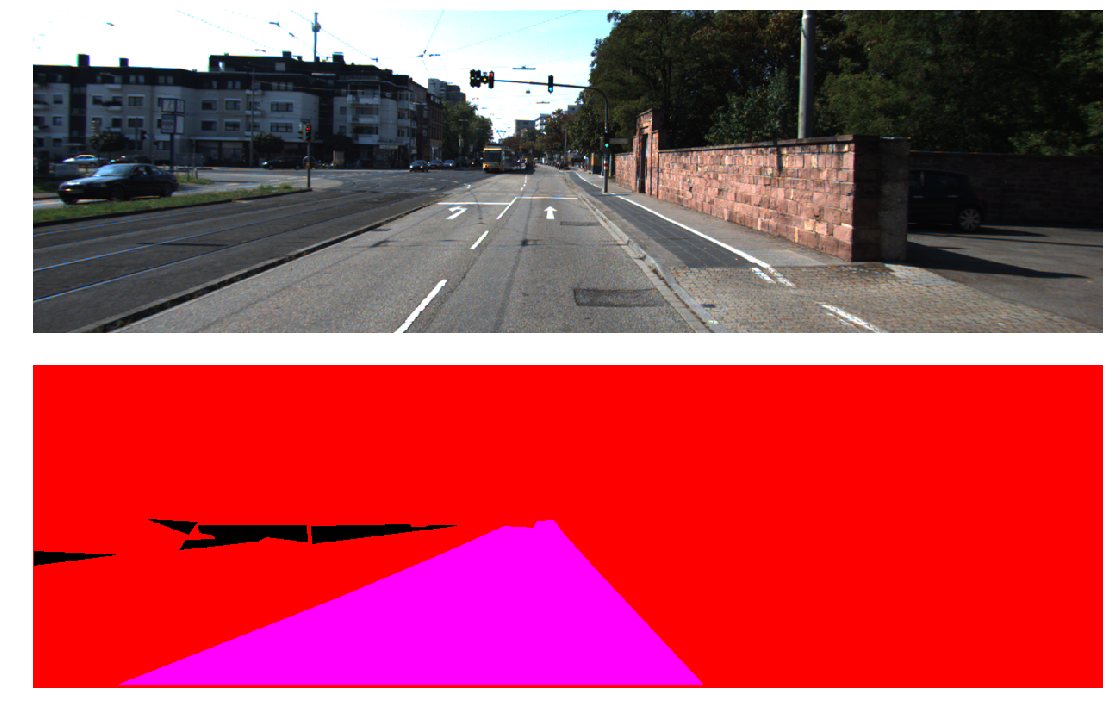

In [4]:
# plot image and ground truth
image_file = '../data/data_road/training/overfit/um_000003.png'
gt_file = '../data/data_road/training/gt_image_2/um_road_000003.png'

img = cv2.imread(image_file)[:,:,::-1]
gt_img = cv2.imread(gt_file)[:,:,::-1]

f, axs = plt.subplots(2, 1, figsize=(20,10))
f.tight_layout()

axs[0].imshow(img)
axs[0].axis('off')
axs[1].imshow(gt_img)
axs[1].axis('off')

In [5]:
# predict on image
num_classes = 2
image_shape = (160, 576)
    
image_file = '../data/data_road/training/overfit/um_000003.png'
image = cv2.resize(cv2.imread(image_file)[:,:,::-1], image_shape[::-1])

im_softmax = sess.run(
    tf.nn.softmax(logits),
    {keep_prob: 1.0, input_image: image[None,:]})
im_softmax = im_softmax[0][:,:,1]
segmentation = (im_softmax > 0.5)[:,:,None]
mask = np.dot(segmentation, np.array([[0, 255, 0]], dtype='uint8'))
street_im = cv2.addWeighted(image, 1, mask, 0.5, 0)

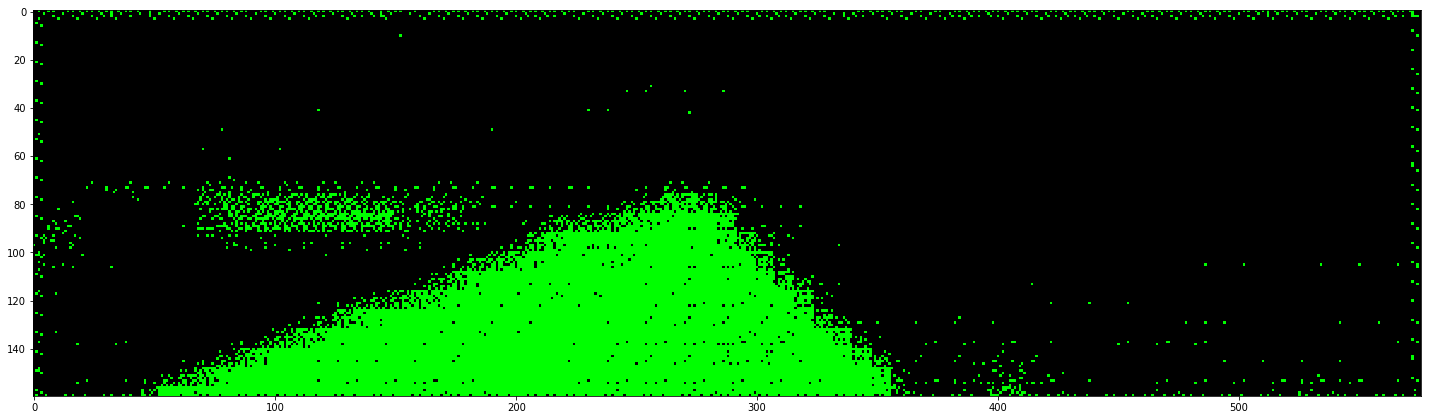

In [6]:
f, axs = plt.subplots(1, 1, figsize=(20,10))
f.tight_layout()
plt.imshow(mask)

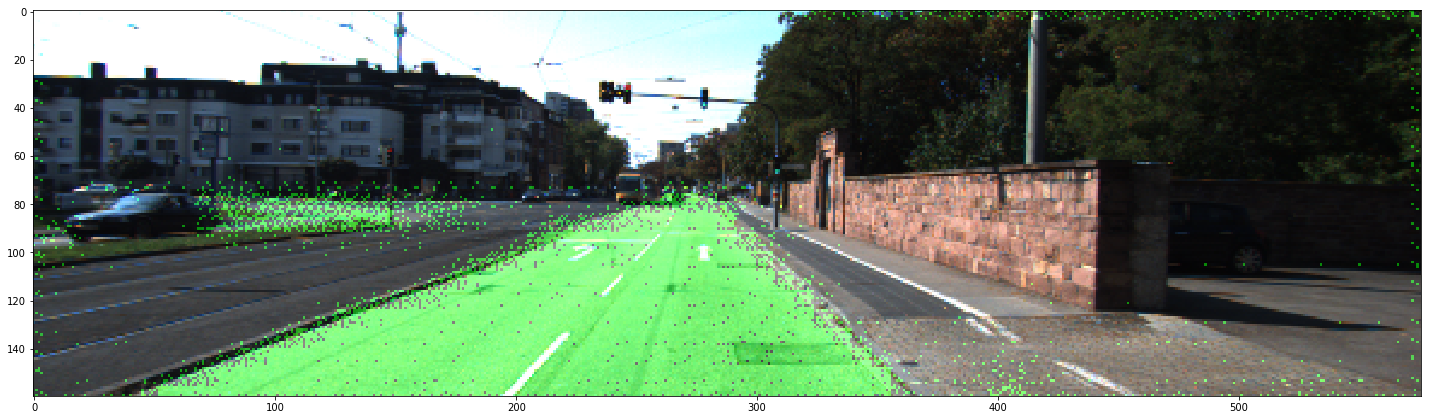

In [7]:
f, axs = plt.subplots(1, 1, figsize=(20,10))
f.tight_layout()
plt.imshow(street_im)